In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
type(digits.data)

numpy.ndarray

In [3]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

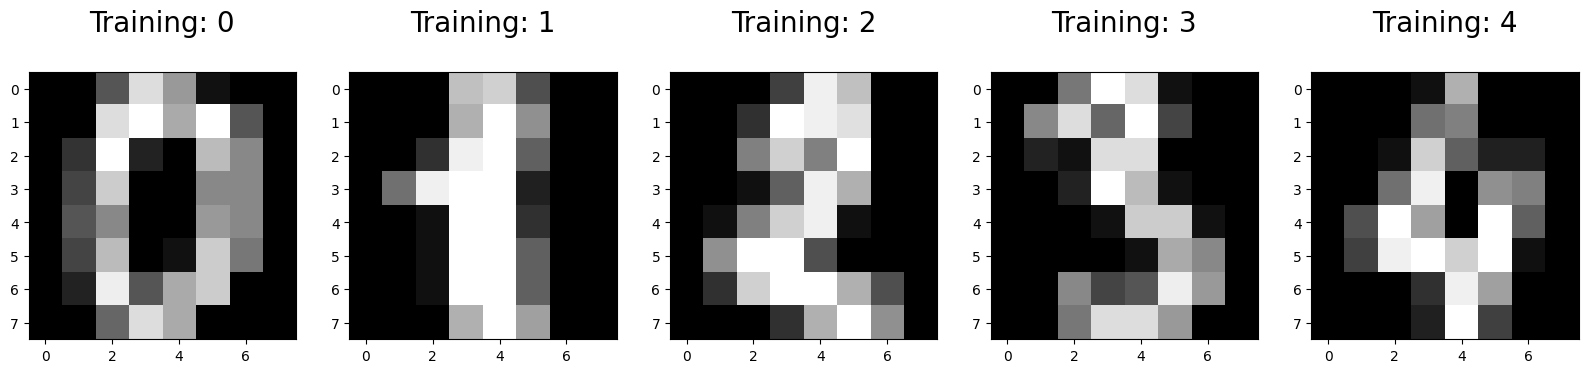

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [9]:
%%time
clf.fit(X_train, y_train)

CPU times: total: 13.4 s
Wall time: 1min 39s


LogisticRegression(C=50, max_iter=10000, solver='saga')

In [10]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
clf.coef_.shape

(10, 64)

In [12]:
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0


array([ 0.  , -0.  , -0.05,  0.11,  0.07, -0.14, -0.16, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.09, -0.06, -0.01, -0.  ,  0.07,
        0.16, -0.03, -0.39,  0.24,  0.09, -0.  , -0.  ,  0.13,  0.16,
       -0.18, -0.56,  0.01,  0.12, -0.  ,  0.  ,  0.15,  0.12, -0.17,
       -0.42,  0.05,  0.07,  0.  , -0.  , -0.06,  0.27, -0.12, -0.2 ,
        0.15,  0.04, -0.  , -0.  , -0.11,  0.08, -0.05,  0.2 ,  0.1 ,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.21, -0.05, -0.06, -0.1 ,
       -0.05])

In [13]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification

array([ 0.00091785, -0.07366458,  0.00529058,  0.00480348,  0.04587454,
        0.00083831, -0.00429791,  0.0110187 ,  0.04406799, -0.03484898])

In [14]:
clf.n_iter_[0] # num of iterations before tolerance was reached

1871

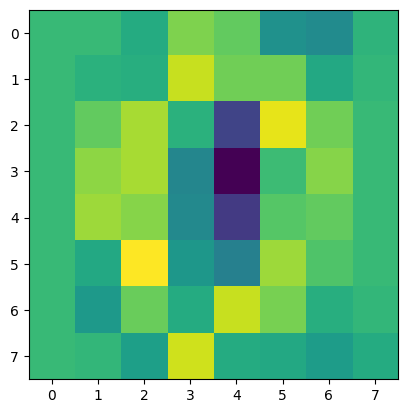

In [15]:
coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));  # proof of concept

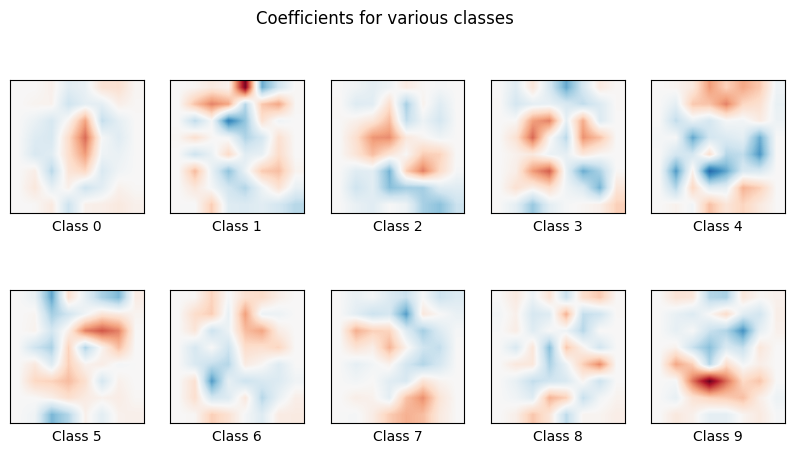

In [16]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [17]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


In [18]:
clf.score(X_train, y_train) # training score

1.0

In [19]:
score = clf.score(X_test, y_test) # test score
score

0.9533333333333334

In [20]:
from sklearn import metrics

In [21]:
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 41,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

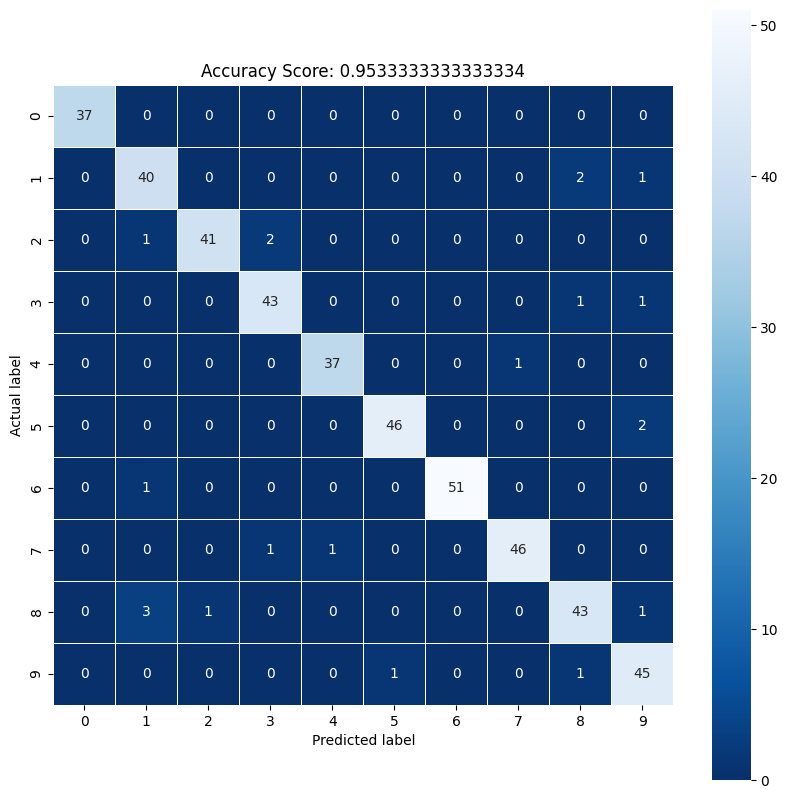

In [22]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

In [23]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [24]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]


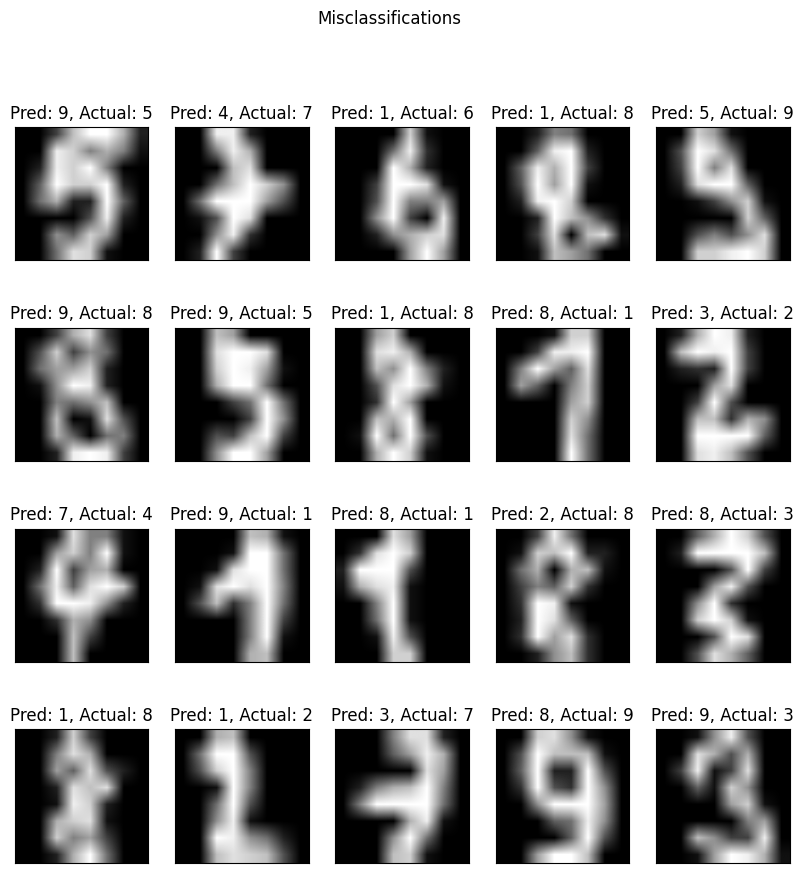

In [25]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');